In [1]:
import scanpy as sc
%reload_ext autoreload
%autoreload 2


In [2]:
cd ..

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks


In [3]:
from utils import *

In [4]:
cd revision

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/revision


In [5]:
import scanpy as sc

In [6]:
ad = sc.read_h5ad('morse_n_adams_n_bal_scvi_patient.id_138341_400_revision.h5da')

Based on new annotations provided by Oliver, we update the mdm.type annotation

In [7]:
ad.obs

,GSM,sample.id,n_counts,log_counts,n_genes,mt_frac,patient.id,cell.type,study,disease.status,...,Diagnosis,COVID-19,Tissue Type,Cell Population,Cell Type,leiden,No of UMIs,No of genes,% of mito genes,Cluster
SC154IPFUP_AAACCTGCATCACGAT-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,15616.0,9.656052,2600.0,0.093558,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAACGGGGTACCGGCT-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,9768.0,9.186867,2008.0,0.084562,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAACGGGTCTGTCCGT-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,27659.0,10.227707,3509.0,0.043386,SC154,FABP4hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAAGATGAGATCCCGC-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,9778.0,9.187890,2276.0,0.070157,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
SC154IPFUP_AAAGATGAGATGCGAC-1-0-0-0-0-0-0,GSM3660658,SC154IPFUP,8610.0,9.060679,1981.0,0.059582,SC154,SPP1hi Macrophage,morse,IPF,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484C_TTGACTTTCATCTGCC-1-0-0-1,nan,nan,16249.0,9.695786,3934.0,0.044187,484C,Macrophage_Outlier_D,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
484C_TTTACTGCAAATTGCC-1-0-0-1,nan,nan,1851.0,7.523481,1096.0,0.044300,484C,Macrophage,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
484C_TTTATGCCAATAGAGT-1-0-0-1,nan,nan,11975.0,9.390576,3415.0,0.046180,484C,Macrophage,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
484C_TTTATGCTCGATAGAA-1-0-0-1,nan,nan,6138.0,8.722254,2506.0,0.061584,484C,Macrophage,adams,control,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan


In [8]:
ad.obs['disease.status'].value_counts()

control     39409
IPF         38460
COPD        30159
covid       22810
BAL (NA)     7503
Name: disease.status, dtype: int64

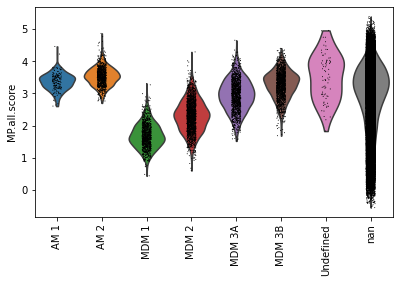

In [9]:
sc.pl.violin(ad, 'MP.all.score', groupby='mdm.type', rotation=90) # , hue='mdm.type'

In [10]:
ad.obs['study'].value_counts()

adams       90477
budinger    22810
morse       17551
BAL          7503
Name: study, dtype: int64

In [11]:
ad.shape

(138341, 17656)

### add the mdm annotation

In [12]:
bal = get_bal()

bal


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future

adding annotation from bal mdm...
scoring genes...
scoring MP.markers 20


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.others 10


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.all 31


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [13]:
bal.obs.index

Index(['AAACCCACAAGCAATA-2', 'AAAGAACGTGTCCGTG-2', 'AAAGGGCCAAGCGCAA-2',
       'AAAGGGCCAGCGAGTA-2', 'AAAGGTACACGGTGTC-2', 'AAAGTCCCAAGGCCTC-2',
       'AAAGTCCCACATACTG-2', 'AAAGTCCTCCTCAGGG-2', 'AAAGTCCTCTTGAGCA-2',
       'AAAGTGAGTTACCCTC-2',
       ...
       'TTCCTAAAGTGCTCAT-8', 'TTCCTCTCATCAGTCA-8', 'TTGATGGAGTTGCTGT-8',
       'TTGCCTGAGCAACAAT-8', 'TTGGATGTCAACCGAT-8', 'TTGGGATCAGCTACTA-8',
       'TTTGACTAGGTTCTTG-8', 'TTTGGTTCAAGTGCTT-8', 'TTTGTTGCAATGAGCG-8',
       'TTTGTTGGTAGTAAGT-8'],
      dtype='object', length=7503)

In [14]:
bal_mdm = sc.read_h5ad('data/bal/bal_mdm.h5ad')
bal.obs['mdm.type'] = bal.obs.index.map(bal_mdm.obs.Cluster.to_dict())
bal.obs['mdm.type'].value_counts()

MDM 2        2006
MDM 3B       1518
MDM 3A       1426
MDM 1        1023
AM 2          929
AM 1          168
Undefined      75
Name: mdm.type, dtype: int64

In [15]:
# here we update the annotation based on labels that Oliver provided on 03.15.2021
annot_new = pd.read_csv('BAL-Mac_labels.csv', index_col=0)
annot_new['found'] = annot_new.index.isin(bal.obs.index)

bal.obs['mdm.type'] = bal.obs.index.map(annot_new['x'].to_dict())
annot_new['x'].value_counts()

2 Mono/Mp          3002
3 SPP1/LGMN-Mp     1274
5 INHBA-AMp        1064
1 FCN1-Mono        1027
4 SPP1/TREM2-Mp     866
6 Prolif. AMp       207
Low quality         148
Name: x, dtype: int64

In [16]:
bal.obs['mdm.type'].value_counts()

2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [17]:
np.bincount(annot_new.index.isin(bal.obs.index))

array([ 443, 7145])

In [18]:
bal.shape

(7503, 27007)

In [19]:
bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
bal.obs['mdm.type'].value_counts()


2 Mono/Mp          2951
3 SPP1/LGMN-Mp     1190
1 FCN1-Mono         992
5 INHBA-AMp         916
4 SPP1/TREM2-Mp     819
Others (COVID)      358
6 Prolif. AMp       175
Low quality         102
Name: mdm.type, dtype: int64

In [20]:
ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-10].map(bal.obs['mdm.type'].to_dict()), 'Others (COVID)')
ad.obs['mdm.type'] = np.where(ad.obs['study'] != 'BAL', 'Others (A/M/B)', ad.obs['mdm.type'])
# bal.obs['mdm.type'] = np.where(pd.isnull(bal.obs['mdm.type']), 'Others (COVID)', bal.obs['mdm.type'])
# ad.obs['mdm.type'] = np.where(ad.obs['study'] == 'BAL', ad.obs.index.str[:-4].map(bal.obs['mdm.type'].to_dict()), 'Others (Adams/Morse)')

In [21]:
ad.obs['mdm.type'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
3 SPP1/LGMN-Mp       1190
1 FCN1-Mono           992
5 INHBA-AMp           916
4 SPP1/TREM2-Mp       819
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type, dtype: int64

In [22]:
print('loaded...')

loaded...


In [23]:
ad.obs[ad.obs['study'] == 'morse'][['sample.id', 'study', 'patient.id', 'disease.status']].drop_duplicates('patient.id').sort_values('disease.status') # ['patient.id'].value_counts().head(20)

,sample.id,study,patient.id,disease.status
SC154IPFUP_AAACCTGCATCACGAT-1-0-0-0-0-0-0,SC154IPFUP,morse,SC154,IPF
SC93IPFLOW_AAACCTGCAGGTCCAC-1-0-0-0-0-0-0,SC93IPFLOW,morse,SC93,IPF
SC94IPFUP_AAACCTGAGTAGCCGA-1-0-0-0-0-0-0,SC94IPFUP,morse,SC94,IPF
SC95IPFLOW_AAAGCAAGTACAGTTC-1-0-0-0-0-0-0,SC95IPFLOW,morse,SC95,IPF
SC153IPFLOW_AAACCTGTCGAACGGA-1-0-0-0-0-0-0,SC153IPFLOW,morse,SC153,IPF
SC87IPFLOW_AAACCTGAGAGCTGGT-1-0-0-0-0-0-0,SC87IPFLOW,morse,SC87,IPF
SC89IPFLOW_AAACCTGCAAGTCATC-1-0-0-0-0-0-0,SC89IPFLOW,morse,SC89,IPF
SC88IPFUP_AAACCTGGTATGAATG-1-0-0-0-0-0-0,SC88IPFUP,morse,SC88,IPF
SC56NOR_AAACCTGCACGGTAGA-1-0-0-0-0-0-0,SC56NOR,morse,SC56,control
SC155NORLOW_AAACCTGAGACAAGCC-1-0-0-0-0-0-0,SC155NORLOW,morse,SC155,control


In [24]:
# ad.var[ad.var['ensembl-0-0'].str.contains('ENSG00000095970')]

### add the mdm annotation

In [25]:
ad.obs['cell.type'].value_counts()

Macrophage_Alveolar                36666
Macrophage                         32089
SPP1hi Macrophage                  10593
M2                                 10453
M3                                  8845
Macrophages                         7503
FABP4hi Macrophage                  6958
Macrophage_Outlier_B                4223
Macrophage_MT-tRNAs                 2077
Macrophage_Outlier_C                2068
nocytes                             1968
Macrophage_Outlier_A                1690
Macrophage_Outlier_F                1688
Macrophage_Alveolar_CellCycle_A     1472
Macrophage_Alveolar_CellCycle_B     1398
Macrophage_Alveolar_Outlier_A       1263
Macrophage_Alveolar_Outlier_B       1219
Macrophage_CellCycle_B              1163
1                                   1030
Macrophage_Outlier_D                 959
Macrophage_Outlier_HSPs              915
Macrophage_Alveolar_Outlier_D        376
Macrophage_Alveolar_Outlier_C        364
Macrophage_CellCycle_A               343
2               

In [26]:
ad.obs['mdm.type'].value_counts()

Others (A/M/B)     130838
2 Mono/Mp            2951
3 SPP1/LGMN-Mp       1190
1 FCN1-Mono           992
5 INHBA-AMp           916
4 SPP1/TREM2-Mp       819
Others (COVID)        358
6 Prolif. AMp         175
Low quality           102
Name: mdm.type, dtype: int64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
bal = ad[ad.obs['study'] == 'BAL',:]

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Alveolar-Mac'),
  Text(1, 0, 'B/DC'),
  Text(2, 0, 'Epithelia'),
  Text(3, 0, 'Mo-Mac'),
  Text(4, 0, 'Neutrophil'),
  Text(5, 0, 'Plasmablast'),
  Text(6, 0, 'T/NK')])

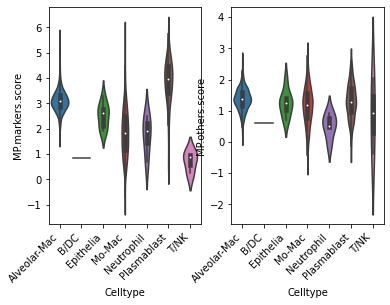

In [29]:
plt.subplot(1, 2, 1)
sns.violinplot(data=bal.obs, x='Celltype', y='MP.markers.score')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.violinplot(data=bal.obs, x='Celltype', y='MP.others.score')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2 Mono/Mp'),
  Text(1, 0, '1 FCN1-Mono'),
  Text(2, 0, '3 SPP1/LGMN-Mp'),
  Text(3, 0, 'Others (COVID)'),
  Text(4, 0, 'Low quality'),
  Text(5, 0, '4 SPP1/TREM2-Mp'),
  Text(6, 0, '6 Prolif. AMp'),
  Text(7, 0, '5 INHBA-AMp')])

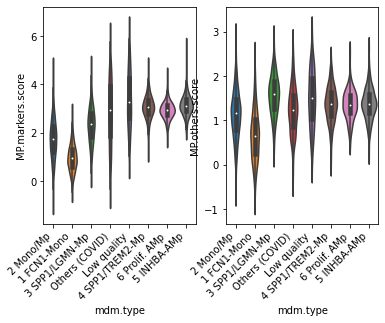

In [30]:
plt.subplot(1, 2, 1)
sns.violinplot(data=bal.obs, x='mdm.type', y='MP.markers.score')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.violinplot(data=bal.obs, x='mdm.type', y='MP.others.score')
plt.xticks(rotation=45, ha='right')

In [31]:
ad.obs['disease.status'] = np.where(ad.obs['study'] == 'BAL', ad.obs['mdm.type'], ad.obs['disease.status'])
# ad.obs['disease.status'] = np.where(ad.obs['disease.status'] == 'BAL', ad.obs['Celltype'], ad.obs['disease.status'])
ad.obs['disease.status'].value_counts()

control            39409
IPF                38460
COPD               30159
covid              22810
2 Mono/Mp           2951
3 SPP1/LGMN-Mp      1190
1 FCN1-Mono          992
5 INHBA-AMp          916
4 SPP1/TREM2-Mp      819
Others (COVID)       358
6 Prolif. AMp        175
Low quality          102
Name: disease.status, dtype: int64

In [32]:
disease = ad.obs['disease.status']
set(disease)

{'1 FCN1-Mono',
 '2 Mono/Mp',
 '3 SPP1/LGMN-Mp',
 '4 SPP1/TREM2-Mp',
 '5 INHBA-AMp',
 '6 Prolif. AMp',
 'COPD',
 'IPF',
 'Low quality',
 'Others (COVID)',
 'control',
 'covid'}

In [33]:
# calculate neighbors in the embedding of without budinger
ad_no_budinger = ad[ad.obs['study'] != 'budinger']
ad_no_budinger.shape
ad_no_budinger.obs.groupby('study').size()
sc.pp.neighbors(ad_no_budinger)

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
         Falling back to preprocessing with `sc.pp.pca` and default params.


In [34]:
# calculate neighbors in the embedding without bal
ad_no_bal = ad[ad.obs['study'] != 'BAL']
ad_no_bal.shape
ad_no_bal.obs.groupby('study').size()
# sc.pp.neighbors(ad_no_bal)

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


study
adams       90477
budinger    22810
morse       17551
dtype: int64

### Calculation of count scores based on distance between cells in the embeddings

- This function needs to be executed several times
- once all minus budinger, and once for all minus bal

In [35]:
def get_scores(ad):
    import numpy as np
    from itertools import combinations

    disease = ad.obs['disease.status']
    conn = ad.uns['neighbors']['connectivities']

    masks = []
    obs = []
    masks = []
    positions = np.arange(ad.shape[0]) # .reshape(w, h)
    conn_array = conn.toarray() if (type(conn) != np.ndarray) else conn

    pos_by_pair = {}

    uniq = set(disease)
    
    print(uniq)
    va = [a for a in uniq if a not in {'IPF', 'COPD', 'control'} and str(a) != 'nan']
    vb = [b for b in uniq if b in {'IPF', 'COPD', 'control'}]

    for i in va:
        for j in vb:
            print(i, j)

            x = positions[disease == i]
            y = positions[disease == j]


            xy = cartesian([x, y])
            x, y = xy[:, 0].flatten(), xy[:, 1].flatten()

            edges = conn_array[x, y]
            edges = np.asarray(edges).flatten()
            x_nodes = x[edges > 0]
            y_nodes = y[edges > 0]
            n_nodes_x, n_nodes_y = x_nodes.shape[0], y_nodes.shape[0]
            nx_uniq, ny_uniq = np.unique(x_nodes).shape[0], np.unique(y_nodes).shape[0]

            k = i + ':' + j
            if not k in pos_by_pair:
                pos_by_pair[i + ':' + j] = {}
            pos_by_pair[i + ':' + j][i] = np.unique(x_nodes)
            pos_by_pair[i + ':' + j][j] = np.unique(y_nodes)

            obs.append([i, j, nx_uniq, ny_uniq, nx_uniq + ny_uniq])

    scores = []
    for mi, mdm_name in enumerate(va):
        x = positions[disease == mdm_name]
        print(mi, len(va), mdm_name)

        idx_by_pos = {pos: idx for pos, idx in zip(list(positions[disease == mdm_name]),
                                               list(disease[disease == mdm_name].index))}

        for xi, pi in enumerate(x):
            if xi % 250 == 0:
                print(xi, len(x))

            sel = conn_array[pi,:]

            mask = (sel > 0) & (ad.obs['study'].isin({'morse', 'adams'}))
            sel_df = ad[mask,:].obs[['study', 'disease.status']]
            sel_df['edge.score'] = sel[mask] 
            sel_df['cell.x'] = pi
            sel_df['cell.x.type'] = mdm_name
            sel_df['cell.y'] = sel_df.index
            sel_df['cell.x.id'] = idx_by_pos[pi]

            # print(pi, sel_df.shape[0])
            scores.append(sel_df.reset_index(drop=True))

    import pandas as pd
    scores = pd.concat(scores)
    scores

    from os.path import exists

    print('here...')
    
    return scores

In [36]:
import pandas
from os.path import exists

In [37]:
budinger = get_budinger()

budinger
scoring MP.markers 20


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.others 10


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


scoring MP.all 31


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


### Because we forgot to include mdm.type to the integrated object, we do this after integration

In [38]:
mdm_type_by_bc = budinger.obs.set_index('Unnamed: 0')['Cell Type'].to_dict()


ad_no_bal.obs['mdm.type'] = np.where(ad_no_bal.obs['study'] == 'budinger', ad_no_bal.obs['Unnamed: 0'].map(mdm_type_by_bc), ad_no_bal.obs['mdm.type'])
ad_no_bal.obs['disease.status'] = np.where((ad_no_bal.obs['study'] == 'budinger'), ad_no_bal.obs['mdm.type'], ad_no_bal.obs['disease.status'])


Trying to set attribute `.obs` of view, copying.


In [39]:
ad_no_bal.obs['Cluster']

SC154IPFUP_AAACCTGCATCACGAT-1-0-0-0-0-0-0    nan
SC154IPFUP_AAACGGGGTACCGGCT-1-0-0-0-0-0-0    nan
SC154IPFUP_AAACGGGTCTGTCCGT-1-0-0-0-0-0-0    nan
SC154IPFUP_AAAGATGAGATCCCGC-1-0-0-0-0-0-0    nan
SC154IPFUP_AAAGATGAGATGCGAC-1-0-0-0-0-0-0    nan
                                            ... 
484C_TTGACTTTCATCTGCC-1-0-0-1                nan
484C_TTTACTGCAAATTGCC-1-0-0-1                nan
484C_TTTATGCCAATAGAGT-1-0-0-1                nan
484C_TTTATGCTCGATAGAA-1-0-0-1                nan
484C_TTTGGTTCATCGGGTC-1-0-0-1                nan
Name: Cluster, Length: 130838, dtype: category
Categories (7, object): ['AM1', 'AM2', 'MoM1', 'MoM2', 'MoM3', 'Monocytes', 'nan']

In [40]:
ad_no_bal.obs['mdm.type'].value_counts()

Others (A/M/B)    108028
MoAM-1              8188
MoAM-2              7665
MoAM-3              5037
TRAM-2               842
TRAM-1               822
MoAM-4               129
TRAM-3               127
Name: mdm.type, dtype: int64

In [41]:
ad_no_bal.obs['mdm.type'] = np.where(ad_no_bal.obs['study'] == 'budinger', ad_no_bal.obs['Cluster'],  ad_no_bal.obs['mdm.type'])
ad_no_bal.obs['disease.status'] = np.where((ad_no_bal.obs['study'] == 'budinger'), ad_no_bal.obs['mdm.type'], ad_no_bal.obs['disease.status'])

In [42]:
ad_no_bal.obs['disease.status'].value_counts()

control      39409
IPF          38460
COPD         30159
MoM2         10453
MoM3          8845
Monocytes     1968
AM1           1030
AM2            290
MoM1           224
Name: disease.status, dtype: int64

In [43]:
idx = list(ad_no_bal.obs.copy().index)
np.random.shuffle(idx)
idx = idx[:1000]
ad_no_bal_sample = ad_no_bal[ad_no_bal.obs.index.isin(set(idx)),:]
ad_no_bal_sample.obs['disease.status'].value_counts()

control      309
IPF          280
COPD         233
MoM2          78
MoM3          72
Monocytes     19
AM1            6
AM2            3
Name: disease.status, dtype: int64

In [44]:
ad_no_bal_sample.obs['disease.status'].value_counts()

control      309
IPF          280
COPD         233
MoM2          78
MoM3          72
Monocytes     19
AM1            6
AM2            3
Name: disease.status, dtype: int64

In [45]:
ad_no_bal.obs['disease.status'].value_counts()

control      39409
IPF          38460
COPD         30159
MoM2         10453
MoM3          8845
Monocytes     1968
AM1           1030
AM2            290
MoM1           224
Name: disease.status, dtype: int64

In [47]:
import pandas as pd
from os.path import exists

In [48]:
scores_by_k = {}
for k, next_ad in zip(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'],
                      [ad_no_budinger, ad_no_bal_sample, ad_no_bal]):
    print(k, next_ad.shape)
    
    p = 'data/conn_scores_by_bal_cell_revision_120k_%s.tsv.gz' % k
    print(exists(p), p)
    if not exists(p): # 'all_minus_bal' in k:
        print('calculating scores...', k)
        print(exists(p), p)
        scores = get_scores(next_ad)
        scores.to_csv(p, sep='\t', compression='gzip', index=None)
        
    if not k in scores_by_k:
        print('loading...')
        scores_by_k[k] = pd.read_csv(p, sep='\t', compression='gzip')
        
    

all_minus_budinger (115531, 17656)
True ../data/conn_scores_by_bal_cell_revision_120k_all_minus_budinger.tsv.gz
loading...
all_minus_bal_sample (1000, 17656)
True ../data/conn_scores_by_bal_cell_revision_120k_all_minus_bal_sample.tsv.gz
loading...
all_minus_bal (130838, 17656)
True ../data/conn_scores_by_bal_cell_revision_120k_all_minus_bal.tsv.gz
loading...


In [49]:
scores_by_k.keys() # ['cell.x.type'].value_counts()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

In [50]:
scores_by_k['all_minus_budinger']['cell.x.type'].value_counts()

2 Mono/Mp          18292
5 INHBA-AMp        10636
4 SPP1/TREM2-Mp     8109
3 SPP1/LGMN-Mp      7060
1 FCN1-Mono         3761
Others (COVID)      3043
6 Prolif. AMp       1591
Low quality          969
Name: cell.x.type, dtype: int64

In [51]:
scores_by_k['all_minus_budinger']['cell.x.type'].value_counts()

2 Mono/Mp          18292
5 INHBA-AMp        10636
4 SPP1/TREM2-Mp     8109
3 SPP1/LGMN-Mp      7060
1 FCN1-Mono         3761
Others (COVID)      3043
6 Prolif. AMp       1591
Low quality          969
Name: cell.x.type, dtype: int64

In [53]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

### Given a subset visualization attempt to plot the data

In [55]:
for k in scores_by_k:
    print(k, scores_by_k[k].shape)

all_minus_budinger (53461, 7)
all_minus_bal_sample (17, 7)
all_minus_bal (195656, 7)


In [56]:
scores_by_k['all_minus_bal']

,study,disease.status,edge.score,cell.x,cell.x.type,cell.y,cell.x.id
0,morse,IPF,0.232685,17551,MoM2,SC154IPFUP_ATCTGCCTCACCGGGT-1-0-0-0-0-0-0,63860-1-0-0-0
1,adams,IPF,0.180219,17551,MoM2,210CO_GGGTTGCTCTGCCAGG-1-0-0-1-0,63860-1-0-0-0
2,adams,control,0.293829,17551,MoM2,092C_TCGAGGCTCGCTTAGA-1-0-0-1,63860-1-0-0-0
3,adams,control,0.121700,17551,MoM2,160C_ATCCACCAGAATGTTG-1-0-0-1,63860-1-0-0-0
4,adams,control,0.255294,17551,MoM2,160C_ATTATCCTCTACTATC-1-0-0-1,63860-1-0-0-0
...,...,...,...,...,...,...,...
195651,adams,COPD,0.148102,40328,AM2,192CO-b_CGGAGTCCACCACGTG-1-0-0-1-0-0,148250-1-0-0-0
195652,adams,IPF,0.198943,40328,AM2,177I_AGATCTGCCGATCTAG-1-0-0-1-0,148250-1-0-0-0
195653,adams,IPF,0.145802,40328,AM2,177I_AGGGTGATCGCACTCT-1-0-0-1-0,148250-1-0-0-0
195654,adams,control,0.493166,40328,AM2,003C_CAACCAAAGAGCCTAG-1-0-0-1,148250-1-0-0-0


In [57]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

In [58]:
# hm4.reindex(hm4.max(axis=1).sort_values(ascending=False).index)

In [59]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal'])

In [66]:
order_by_k = {'all_minus_bal': ['MoM1', 'MoM3', 'AM2', 'Monocytes', 'AM1', 'MoM2'],
              'all_minus_budinger': ['6 Prolif. AMp', '2 Mono/Mp', '3 SPP1/LGMN-Mp', '4 SPP1/TREM2-Mp', '1 FCN1-Mono', '5 INHBA-AMp'],
              'all_minus_budinger_updated_ann': ['CD163/LGMN-Mφ', 'Prolif. AMφ', 'Mono/Mφ', 'AMφ-1', 'Monocytes', 'AMφ-2']}

In [67]:
# to plot the circlesheatmap we need a custom library
from lib.Plots.CirclesHeatmap import CirclesHeatmap

import pandas..
importing path functions...
importing stat functions...
ipdb is not installed and cannot be imported...
importing misc functions..
importing done...
importing plot functions...


In [68]:
print('here')

here


In [69]:
## a new annotations has been proposed and has to be incorporated into the objects
mapping_revision_2021 = pd.read_csv('barcodes_cluster_annotation_OD.csv', index_col=0)
assert sum(ad.obs.index == mapping_revision_2021.index) == ad.shape[0]
ad_no_budinger.obs['bal_clusters'] = ad_no_budinger.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
ad_no_budinger.obs['bal_clusters'] = ad_no_budinger.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())
ad_no_budinger.obs['bal_clusters'].value_counts()

other            108028
Monocytes          2012
CD163/LGMN-Mφ      1723
Mono/Mφ            1555
AMφ-1               998
AMφ-2               713
low quality         310
Prolif. AMφ         192
Name: bal_clusters, dtype: int64

In [72]:
ad_no_budinger[ad_no_budinger.obs.index == 'ACTTCGCAGCATGCAG-2-1-0-0-0-0',:].obs

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,GSM,sample.id,n_counts,log_counts,n_genes,mt_frac,patient.id,cell.type,study,disease.status,MP.markers.score,MP.others.score,MP.all.score,nUMI,nGene,...,Study,Sample Source,Sample Name,Sample Status,Diagnosis,COVID-19,Tissue Type,Cell Population,Cell Type,leiden,No of UMIs,No of genes,% of mito genes,Cluster,bal_clusters
ACTTCGCAGCATGCAG-2-1-0-0-0-0,nan,nan,34548.0,NaN,NaN,NaN,C19-62,Macrophages,BAL,4 SPP1/TREM2-Mp,3.076404,1.876537,3.562651,NaN,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,AMφ-1


In [73]:
scores = scores_by_k['all_minus_budinger'].copy()
scores['cell.x.type'] = scores['cell.x.id'].map(mapping_revision_2021['bal_clusters'].to_dict())
scores_by_k['all_minus_budinger_updated_ann'] = scores

In [74]:
set(scores_by_k['all_minus_budinger_updated_ann']['cell.x.type'])

{'AMφ-1',
 'AMφ-2',
 'CD163/LGMN-Mφ',
 'Mono/Mφ',
 'Monocytes',
 'Prolif. AMφ',
 'low quality'}

In [75]:
scores_by_k.keys()

dict_keys(['all_minus_budinger', 'all_minus_bal_sample', 'all_minus_bal', 'all_minus_budinger_updated_ann'])

In [76]:
print('here...')

here...


In [77]:
for k in scores_by_k:
    if not 'all_minus_budinger_updated_ann' in k:
        continue
    if 'sample' in k:
        continue
    print(k)
    # if not 'all_minus_budinger' in k:
    #     continue
    # if k != 'all_minus_budinger':
    #     continue
    
    scores = scores_by_k[k]
    
    cell_id_by_index = scores.set_index('cell.x')['cell.x.id'].to_dict()
    
    print('calculating scores per position...')
    
    hm = []
    for cell_id, grp in scores.groupby('cell.x'):
        # print(cell_id, grp.shape)
        sel = pd.DataFrame(grp['disease.status'].value_counts()).reset_index()
        sel['cell.id'] = cell_id
        hm.append(sel)
    hm = pd.concat(hm)


    print('establishing pivot steps...')
    hm2 = hm.pivot('cell.id', 'index', 'disease.status').fillna(0)
    hm2['proximity.mapping.label'] = hm2.idxmax(axis=1)
    hm2['mdm.type'] = hm2.index.map(scores.set_index('cell.x')['cell.x.type'].to_dict())
    hm_df = pd.DataFrame(hm2.groupby(['mdm.type', 'proximity.mapping.label']).size()).reset_index()
    hm3 = hm_df.pivot('mdm.type', 'proximity.mapping.label', 0)

    hm2['cell.id'] = hm2.index.map(cell_id_by_index)
    len(set(hm2['cell.id']))

    from os.path import join
    import matplotlib
    import matplotlib.pyplot as plt

    
    print('setting up plotting parameters...')
    fpath = join(plt.rcParams["datapath"], "fonts/ttf/arial.ttf")
    from matplotlib import font_manager as fm, rcParams
    prop = fm.FontProperties(fname=fpath)
    rcParams["font.family"] = "arial"

    fpath = join(plt.rcParams["datapath"], "fonts/ttf/arial.ttf")
    from matplotlib import font_manager as fm, rcParams
    prop = fm.FontProperties(fname=fpath)
    rcParams["font.family"] = "arial"

    hm_df = hm_df[~hm_df['mdm.type'].isin({'Undefined', 'Low quality', 'Others (COVID)'})]

    # for visualization purposes we'll remove COPD from our visualization layouts...
    hm_df = hm_df[hm_df['proximity.mapping.label'] != 'COPD']
    sum(hm_df[0])


    from scipy.stats import fisher_exact 
    from lib.RFacade import RFacade


    print('calculating enrichments.......')
    res = []
    for mdm_type in set(hm_df['mdm.type']):
        print(mdm_type)
        
        # we 
        for prox_map_lab in set(hm_df['proximity.mapping.label']):
            a = sum(hm_df[(hm_df['mdm.type'] == mdm_type) & (hm_df['proximity.mapping.label'] == prox_map_lab)][0])
            b = sum(hm_df[(hm_df['mdm.type'] == mdm_type) & (hm_df['proximity.mapping.label'] != prox_map_lab)][0])
            c = sum(hm_df[(hm_df['mdm.type'] != mdm_type) & (hm_df['proximity.mapping.label'] == prox_map_lab)][0])
            d = sum(hm_df[(hm_df['mdm.type'] != mdm_type) & (hm_df['proximity.mapping.label'] != prox_map_lab)][0])
            t = [mdm_type, prox_map_lab, a, b, c, d] + list(fisher_exact([[a, b], [c, d]], alternative='greater'))
            res.append(t)
    res = pd.DataFrame(res, columns=['mdm.type', 'prox.map.lab', 'a', 'b', 'c', 'd', 'odds.ratio', 'p.val'])
    res['p.adj'] = RFacade.get_bh_pvalues(res['p.val'])
    res['asterisk'] = RFacade.get_pval_asterisks(res['p.adj'])
    res[res['p.adj'] < 0.1].sort_values('p.adj')

    hm3 = hm_df.pivot('mdm.type', 'proximity.mapping.label', 0)[['IPF', 'control']] # 'COPD']]
    hm3_sig = res.pivot('mdm.type', 'prox.map.lab', 'asterisk')[['IPF', 'control']]#  'COPD']]
    hm3_padj = res.pivot('mdm.type', 'prox.map.lab', 'p.adj')[['IPF', 'control']]#  'COPD']]

    import matplotlib
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    import importlib
    from lib.utils import *

    print('# of cells in the treatment')
    print(hm3.sum().sum())
    
    print('plotting...')
    hm4 = hm3.copy()
    for c in hm4:
        hm4[c] = hm4[c] / hm3.sum(axis=1)
    hm4

    hm4 = hm4.reindex(hm4.max(axis=1).sort_values(ascending=False).index)

    new_idx = order_by_k[k]
    print(new_idx)
    print(hm4.index)
    hm4 = hm4.reindex(new_idx)
    print(hm4.index)
    
    
    hm3_sig = hm3_sig.reindex(hm4.index)
    hm3_padj = hm3_padj.reindex(hm3_sig.index)
    
    annot = (hm4).astype(str) + np.where(hm3_sig.astype(str) != '', '*', '')
    for c in annot:
        annot[c] = annot[c].astype(str).str[:4] + np.where(annot[c].astype(str).str.contains('\*'), '*', '')
    annot


    import seaborn as sns
    cg = sns.clustermap(hm4, annot=annot,
                        fmt='', cmap='Reds', row_cluster=False, col_cluster=False)
    # plt.yticks(rotation=0)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.subplots_adjust(bottom=.7, right=.3)

    
    cg.fig.suptitle('# of cells %i' % hm3.sum().sum())
    plt.savefig('data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision_%s.pdf' % k)
    plt.close()
    
    rcParams['figure.dpi'] = 90
    line_widths = pd.DataFrame(np.where(hm3_sig != '', 2.0, .3), index=hm3_sig.index, columns=hm3_sig.columns)
    
    for power in 1.0, 2.5, 3.0:
        if power != 2.5:
            continue
        CirclesHeatmap.make_bubble_heatmap(-np.log10(hm3_padj), hm4,
                                           heatmap_grid=[4, 6, 0, 2, 2, 1],
                                           quantAmplifier=40,
                                           colorbar_grid=[2, 5, 0, 4, 2, 1],
                                           cbar_label='-log10(adjusted P)', ha='right',
                                           circles_legend_title='Fractoin of cells [rows]', h=10, w=12,
                                           tickscolorbar=[0, 25 / (2 if 'budinger' in k else 1), 50 / (2 if 'budinger' in k else 1)],
                                           power=power, line_widths=line_widths,
                                           circle_legend_ticks=[0, 0.25, .5, .75, 1.0], palette_id='Reds', vmin=0, vmax=25 if 'budinger'in k else 50,
                                           heatmap_title=k)
        pdf_path = 'data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision_%s_dotplot_%.1f.pdf' % (k, power)
        import os
        plt.savefig(pdf_path)
        plt.close()
        print(abspath(pdf_path))
    
    # save raw data (for oliver)
    -np.log10(hm3_padj)
    
    # break
    
    # assert False

all_minus_budinger_updated_ann
calculating scores per position...
establishing pivot steps...
setting up plotting parameters...
calculating enrichments.......
Monocytes
Mono/Mφ
Prolif. AMφ
AMφ-2
AMφ-1
low quality
CD163/LGMN-Mφ


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


# of cells in the treatment
5699
plotting...
['CD163/LGMN-Mφ', 'Prolif. AMφ', 'Mono/Mφ', 'AMφ-1', 'Monocytes', 'AMφ-2']
Index(['Prolif. AMφ', 'low quality', 'CD163/LGMN-Mφ', 'AMφ-2', 'Mono/Mφ', 'AMφ-1', 'Monocytes'], dtype='object', name='mdm.type')
Index(['CD163/LGMN-Mφ', 'Prolif. AMφ', 'Mono/Mφ', 'AMφ-1', 'Monocytes', 'AMφ-2'], dtype='object', name='mdm.type')


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/seaborn/utils.py:281: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_xticks(newticks)


before plotting dimensions...
(6, 2)
('legends', [0, 0.25, 0.5, 0.75, 1.0])
1.0
('next size', 0.0)
1.0
('next size', 50.0)
1.0
('next size', 282.842712474619)
1.0
('next size', 779.4228634059948)
1.0
('next size', 1600.0)
/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision_all_minus_budinger_updated_ann_dotplot_2.5.pdf


<Figure size 540x360 with 0 Axes>

In [78]:
-np.log10(hm3_padj)

prox.map.lab,IPF,control
mdm.type,,
CD163/LGMN-Mφ,1.361817e+01,1.682559e-12
Prolif. AMφ,9.977532e+00,1.682559e-12
Mono/Mφ,9.662267e-02,1.682559e-12
AMφ-1,1.682559e-12,1.628640e+00
Monocytes,1.682559e-12,4.114993e+00
AMφ-2,1.682559e-12,1.773622e+01


In [79]:
hm3_padj

prox.map.lab,IPF,control
mdm.type,,
CD163/LGMN-Mφ,2.408977e-14,1.000000e+00
Prolif. AMφ,1.053097e-10,1.000000e+00
Mono/Mφ,8.005295e-01,1.000000e+00
AMφ-1,1.000000e+00,2.351582e-02
Monocytes,1.000000e+00,7.673741e-05
AMφ-2,1.000000e+00,1.835599e-18


In [80]:
CirclesHeatmap.make_bubble_heatmap?

Signature:
CirclesHeatmap.make_bubble_heatmap(
    order_frame,
    sizeDict,
    na_color='gray',
    title='title',
    tickscolorbar=[-2, -1, 0, 1, 2],
    vmin=-2.5,
    vmax=2.5,
    heatmap_grid=[2, 4, 0, 2, 2, 1],
    circle_legend_grid=[2, 4, 0, 2, 2, 1],
    colorbar_grid=[2, 5, 0, 3, 2, 1],
    palette_id='RdBu_r',
    cbar_label='cbar_label',
    ncols=8,
    marker=None,
    **kwargs,
)
Docstring: <no docstring>
File:      /mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/wild/lib/Plots/CirclesHeatmap.py
Type:      function


In [81]:
hm4

proximity.mapping.label,IPF,control
mdm.type,,
CD163/LGMN-Mφ,0.661313,0.338687
Prolif. AMφ,0.832168,0.167832
Mono/Mφ,0.576981,0.423019
AMφ-1,0.534121,0.465879
Monocytes,0.526723,0.473277
AMφ-2,0.366359,0.633641


In [ ]:
print(abspath('data/figures/'))

### Warning: Here the last one to be executed has to be **all_minus_budinger**, otherwise the heatmaps below are not properly updated.

In [ ]:
print('here...')

In [ ]:
hm3

In [ ]:
hm4

In [62]:
print('here...')

here...


In [82]:
scores['cell.x.type'].value_counts()

CD163/LGMN-Mφ    10785
Mono/Mφ          10268
AMφ-1            10263
Monocytes         9401
AMφ-2             8513
low quality       2482
Prolif. AMφ       1749
Name: cell.x.type, dtype: int64

In [83]:
hm3_sig

prox.map.lab,IPF,control
mdm.type,,
CD163/LGMN-Mφ,****,
Prolif. AMφ,****,
Mono/Mφ,,
AMφ-1,,*
Monocytes,,****
AMφ-2,,****


In [84]:
hm3

proximity.mapping.label,IPF,control
mdm.type,,
AMφ-1,407,355
AMφ-2,159,275
CD163/LGMN-Mφ,947,485
Mono/Mφ,772,566
Monocytes,749,673
Prolif. AMφ,119,24
low quality,116,52


In [85]:
hm4

proximity.mapping.label,IPF,control
mdm.type,,
CD163/LGMN-Mφ,0.661313,0.338687
Prolif. AMφ,0.832168,0.167832
Mono/Mφ,0.576981,0.423019
AMφ-1,0.534121,0.465879
Monocytes,0.526723,0.473277
AMφ-2,0.366359,0.633641


In [87]:
abspath('data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision.pdf')

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/data/figures/majority_label_heatmap_with_fisher_exact_test_padj_revision.pdf'

(array([ 7737., 21659.,  9883.,  4527.,  2442.,  1542.,   933.,   696.,
          484.,  3558.]),
 array([7.52246700e-05, 1.00067702e-01, 2.00060180e-01, 3.00052657e-01,
        4.00045135e-01, 5.00037612e-01, 6.00030090e-01, 7.00022567e-01,
        8.00015045e-01, 9.00007522e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

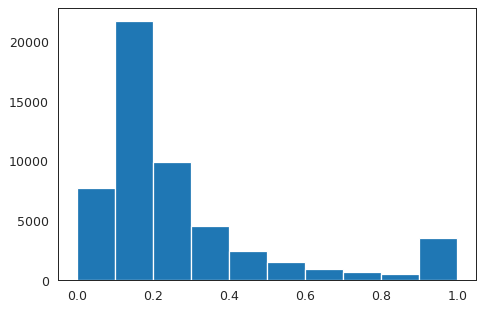

In [88]:
plt.hist(scores['edge.score'])

In [89]:
# df = pd.DataFrame(obs, columns=['a', 'b', 'n.a', 'n.b', 'n.total'])
# df.sort_values('n.total', ascending=False)

In [90]:
ad.shape

(138341, 17656)

In [91]:
# pos_by_pair.keys()

In [92]:
def get_assoc_cell_by_mdm_type(mdm_type):
    ref = mdm_type
    print('running...')
    final = None
    keys_by_group = {}
    for k2 in ['COPD', 'IPF', 'control']:
        # print(ref, k2)
        k = ref + ':' + k2
        if not k in pos_by_pair:
            k = k2 + ':' + ref
        if not k in pos_by_pair:
            continue

        a = ad[pos_by_pair[k][ref],:]
        a.obs['selection'] = k
        keys_by_group[k] = set(a.obs.index)
        final = a if final is None else final.concatenate(a)

    filter_uniq = True
    if filter_uniq:
        uniq_by_k = {}
        for k in keys_by_group:
            uniq = set(keys_by_group[k])
            # print(k, len(keys_by_group[k]))
            for k2 in keys_by_group:
                if k == k2:
                    continue
                # print('removing if overlapping with %s' % k2, len(keys_by_group[k2]))
                uniq -= keys_by_group[k2]
            # print('uniq', len(uniq))
            uniq_by_k[k] = uniq
            # print('')
        for k in uniq_by_k:
            continue
            print(k, len(uniq_by_k[k]))

    # print('running...')
    final = None
    for k2 in ['COPD', 'IPF', 'control']:
        # print(ref, k2)
        k = ref + ':' + k2
        if not k in pos_by_pair:
            k = k2 + ':' + ref
        if not k in pos_by_pair:
            continue

        a = ad[pos_by_pair[k][ref],:]
        a.obs['selection'] = k

        if filter_uniq:
            a = a[(a.obs['selection'] == k) & (a.obs.index.isin(set(uniq_by_k[k]))),:]
        else:
            a = a[(a.obs['selection'] == k),:]
        # print(k, a.shape)
        final = a if final is None else final.concatenate(a)

    final.obs['closest.disease.status'] = final.obs['selection'].str.split(':').str[1]
    return final

In [93]:
k

'all_minus_budinger_updated_ann'

In [94]:
final = ad_no_bal if k == 'ad_minus_bal' else ad_no_budinger if (k == 'all_minus_budinger' or k == 'all_minus_budinger_updated_ann') else None
print(final.shape)
assert final is not None
final = final.copy()

(115531, 17656)


In [95]:
# hm2.head()
final = final[final.obs.index.isin(set(hm2['cell.id'])),:]
final.obs['closest.disease.status'] = final.obs.index.map(hm2.set_index('cell.id')['proximity.mapping.label'].to_dict())
final.shape

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


(7055, 17656)

In [96]:
# final.obs['selection'].value_counts()

In [97]:
# hm2[hm2['cell.id'] == '483C_CGCTTCACATTCACTT-1-0']

In [98]:
for c in set(bal.obs['Celltype']):
    sel = bal.obs[bal.obs['Celltype'] == c]
    print(c, sel.shape[0], sel[pd.isnull(sel['mdm.type'])].shape[0])

Neutrophil 5 0
Alveolar-Mac 1605 0
Mo-Mac 5718 0
T/NK 3 0
Plasmablast 163 0
B/DC 1 0
Epithelia 8 0


In [99]:
final.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())

Index(['CD163/LGMN-Mφ', 'Monocytes', 'Mono/Mφ', 'Monocytes', 'Mono/Mφ', 'CD163/LGMN-Mφ', 'low quality', 'Mono/Mφ', 'Monocytes', 'Monocytes',
       ...
       'Monocytes', 'Monocytes', 'CD163/LGMN-Mφ', 'CD163/LGMN-Mφ', 'CD163/LGMN-Mφ', 'Mono/Mφ', 'Mono/Mφ', 'Mono/Mφ', 'Mono/Mφ', 'Mono/Mφ'], dtype='object', length=7055)

In [100]:
final.obs['mdm.type'] = final.obs.index.map(mapping_revision_2021['bal_clusters'].to_dict())


In [101]:
final.obs['mdm.type'].value_counts()

Monocytes        1708
CD163/LGMN-Mφ    1650
Mono/Mφ          1497
AMφ-1             997
AMφ-2             713
low quality       300
Prolif. AMφ       190
Name: mdm.type, dtype: int64

In [102]:
hm2['cell.id']

cell.id
17551    AAACCCACAAGCAATA-2-1-0-0-0-0
17552    AAAGAACGTGTCCGTG-2-1-0-0-0-0
17553    AAAGGGCCAAGCGCAA-2-1-0-0-0-0
17554    AAAGGGCCAGCGAGTA-2-1-0-0-0-0
17555    AAAGGTACACGGTGTC-2-1-0-0-0-0
                     ...             
25049    TTGGGATCAGCTACTA-8-1-0-0-0-0
25050    TTTGACTAGGTTCTTG-8-1-0-0-0-0
25051    TTTGGTTCAAGTGCTT-8-1-0-0-0-0
25052    TTTGTTGCAATGAGCG-8-1-0-0-0-0
25053    TTTGTTGGTAGTAAGT-8-1-0-0-0-0
Name: cell.id, Length: 7055, dtype: object

In [103]:
final.obs.groupby(['mdm.type', 'closest.disease.status']).size().reset_index()

,mdm.type,closest.disease.status,0
0,AMφ-1,COPD,235
1,AMφ-1,IPF,407
2,AMφ-1,control,355
3,AMφ-2,COPD,279
4,AMφ-2,IPF,159
5,AMφ-2,control,275
6,CD163/LGMN-Mφ,COPD,218
7,CD163/LGMN-Mφ,IPF,947
8,CD163/LGMN-Mφ,control,485
9,Mono/Mφ,COPD,159


In [104]:
final.obs.groupby(['mdm.type', 'closest.disease.status']).size().reset_index().pivot('mdm.type', 'closest.disease.status', 0)[['IPF', 'control']]

closest.disease.status,IPF,control
mdm.type,,
AMφ-1,407,355
AMφ-2,159,275
CD163/LGMN-Mφ,947,485
Mono/Mφ,772,566
Monocytes,749,673
Prolif. AMφ,119,24
low quality,116,52


In [105]:
rcParams['figure.figsize'] = [10, 5]
sns.violinplot(data=final.obs, x='mdm.type', y='MP.all.score', hue='closest.disease.status', hue_order=['IPF', 'control'])
plt.xticks(rotation=45, ha='right')

plt.savefig('data/figures/closest_disease_status_gene_scores_bal.pdf')
plt.close()

In [106]:
from matplotlib import rcParams
from lib.RFacade import RFacade
rcParams['figure.figsize'] = [10, 15]

mdm_types = set(final.obs['mdm.type'])
nrows = len(mdm_types)
print(nrows)

all_dotplot = []

# final = get_assoc_cell_by_mdm_type(mdm_type)
res_by_mdm_type = []
for ri, mdm_type in enumerate(mdm_types):
    print(mdm_type)
    
    final_sel = final[final.obs['mdm.type'] == mdm_type,:]
        
    for pi, marker_genes_lab in enumerate(['markers', 'others', 'all']):
        ax = plt.subplot2grid([len(mdm_types), 3], [ri, pi])

        ylab = 'MP.%s.score' % marker_genes_lab

        xorder = ['IPF', 'COPD', 'control']
        sns.violinplot(data=final_sel.obs, x='closest.disease.status',
                       y=ylab, order=xorder)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks(rotation=45, ha='right')
        plt.title(mdm_type)


        # Calculate number of obs per group & median to position labels
        val_by_xi = {}
        nobs_by_xi = {}
        for xi in xorder:
            val = final_sel.obs[final_sel.obs['closest.disease.status'] == xi]
            val_by_xi[xi] = max(val[ylab]) if len(val[ylab]) != 0 else 0
            nobs_by_xi[xi] = val[ylab].shape[0]

        # Add it to the plot
        pos = range(len(nobs_by_xi))
        for tick, label, xi in zip(pos, ax.get_xticklabels(), xorder):
           ax.text(pos[tick], val_by_xi[xi] + 0.5, nobs_by_xi[xi], horizontalalignment='center',
                   size='x-small', color='black', weight='semibold', fontsize=8)
        
    df = []
    for gene_group in ['MP.markers.score', 'MP.others.score', 'MP.all.score']:
        for a, b in combinations(set(['IPF', 'COPD', 'control']), r=2):
            x = np.array(final_sel.obs[final_sel.obs['closest.disease.status'] == a][gene_group])
            y = np.array(final_sel.obs[final_sel.obs['closest.disease.status'] == b][gene_group])
            pval = RFacade.get_wilcox_test_pval(x, y, alternative='two.sided')
            df.append([gene_group, a, np.median(x), len(x), b, np.median(y), len(y), pval])
    df = pd.DataFrame(df, columns=['gene.group', 'a', 'median.a', 'n.a', 'b', 'median.b', 'n.b', 'p.val'])
    df['p.adj'] = RFacade.get_bh_pvalues(df['p.val'])
    df.sort_values('p.adj')
    df['mdm.type'] = mdm_type
    res_by_mdm_type.append(df)

    all_dotplot.append(final_sel)
     
df = pd.concat(res_by_mdm_type)
plt.tight_layout()
# plt.subplots_adjust(bottom=.5)
save = True
if save:
    plt.savefig('data/figures/scores_only_uniquely_assigned_ad_no_bal.pdf')
    plt.close()


7
Monocytes


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Mono/Mφ


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Prolif. AMφ


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AMφ-2


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AMφ-1


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


low quality


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


CD163/LGMN-Mφ


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


### Check whether normalized expression values are so different between BAL/Adams/Morse

In [107]:
abspath('data/figures/scores_only_uniquely_assigned.pdf')

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/saliba_macrophages/notebooks/revision/data/figures/scores_only_uniquely_assigned.pdf'

In [108]:
sel_obs = ad[:,ad.var.index == 'TREM2'].obs[['study', 'disease.status']]
sel_expr = ad[:,ad.var.index == 'TREM2'].to_df()

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [109]:
sel_expr = pd.concat([sel_expr, sel_obs], axis=1)

In [110]:
sel_expr

,TREM2,study,disease.status
SC154IPFUP_AAACCTGCATCACGAT-1-0-0-0-0-0-0,5.263263,morse,IPF
SC154IPFUP_AAACGGGGTACCGGCT-1-0-0-0-0-0-0,0.000000,morse,IPF
SC154IPFUP_AAACGGGTCTGTCCGT-1-0-0-0-0-0-0,6.584918,morse,IPF
SC154IPFUP_AAAGATGAGATCCCGC-1-0-0-0-0-0-0,6.016356,morse,IPF
SC154IPFUP_AAAGATGAGATGCGAC-1-0-0-0-0-0-0,0.000000,morse,IPF
...,...,...,...
484C_TTGACTTTCATCTGCC-1-0-0-1,0.000000,adams,control
484C_TTTACTGCAAATTGCC-1-0-0-1,0.000000,adams,control
484C_TTTATGCCAATAGAGT-1-0-0-1,0.000000,adams,control
484C_TTTATGCTCGATAGAA-1-0-0-1,5.789468,adams,control


In [111]:
bal = sc.read_h5ad('data/bal/bal.h5ad')

In [112]:
bal.to_df().describe()

,ENSG00000238009,ENSG00000239945,ENSG00000241599,ENSG00000229905,ENSG00000237491,ENSG00000177757,ENSG00000225880,ENSG00000230368,ENSG00000230699,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000187642,ENSG00000272512,...,ENSG00000277761,ENSG00000277836,ENSG00000278704,ENSG00000277400,ENSG00000274847,ENSG00000276256,ENSG00000273748,ENSG00000276017,ENSG00000278817,ENSG00000277196,ENSG00000278384,ENSG00000276345,ENSG00000277856,ENSG00000275063,ENSG00000271254
count,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,...,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.00000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000
mean,0.004206,0.000362,0.001357,0.000430,0.062744,0.000656,0.017862,0.017591,0.000497,0.002080,0.297465,0.016393,0.031564,0.000384,0.000859,...,0.000068,0.000565,0.003437,0.001673,0.015036,0.006806,0.035273,0.00009,0.023515,0.000045,0.049721,0.082551,0.008298,0.008117,0.035250
std,0.065754,0.020171,0.036808,0.020723,0.275833,0.025599,0.138625,0.142361,0.022298,0.049373,0.758595,0.132045,0.199031,0.019602,0.032239,...,0.010633,0.082222,0.059292,0.043027,0.126436,0.085453,0.204690,0.00951,0.173516,0.009510,0.249073,0.437047,0.506860,0.315923,0.243025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,7.000000,1.000000,3.000000,17.000000,2.000000,5.000000,1.000000,2.000000,...,2.000000,17.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.00000,5.000000,2.000000,5.000000,11.000000,56.000000,28.000000,7.000000


In [113]:
df['sig'] = df['p.adj'] < 0.1
df.sort_values('p.adj').to_csv('data/test_inferred_disease_status_comparisons_by_mdm_%s.tsv' % k, index=None, sep='\t')


In [116]:
'data/test_inferred_disease_status_comparisons_by_mdm_%s.tsv' % k

'../data/test_inferred_disease_status_comparisons_by_mdm_all_minus_budinger_updated_ann.tsv'

In [114]:
ll data/test_inferred_disease_status_comparisons_by_mdm_*

-rw-r--r--. 1 ignacio.ibarra 6761 Jun 22 15:01 ../data/test_inferred_disease_status_comparisons_by_mdm_all_minus_bal.tsv
-rw-r--r--. 1 ignacio.ibarra 9448 Jun 22 15:52 ../data/test_inferred_disease_status_comparisons_by_mdm_all_minus_budinger.tsv
-rw-r--r--. 1 ignacio.ibarra 8118 Jul  8 22:46 ../data/test_inferred_disease_status_comparisons_by_mdm_all_minus_budinger_updated_ann.tsv
-rw-r--r--. 1 ignacio.ibarra 6761 Jun 21 18:38 ../data/test_inferred_disease_status_comparisons_by_mdm_no_bal.tsv


In [117]:
df1 = pd.read_csv('data/test_inferred_disease_status_comparisons_by_mdm_all_minus_budinger.tsv', sep='\t')
df2 = pd.read_csv('data/test_inferred_disease_status_comparisons_by_mdm_all_minus_bal.tsv', sep='\t')
df3 = pd.read_csv('data/test_inferred_disease_status_comparisons_by_mdm_all_minus_budinger_updated_ann.tsv', sep='\t')
df1['lab'] = 'Present Study'
df2['lab'] = 'Bharat'
df3['lab'] = 'Present Study - revision'

df = pd.concat([df1, df2, df3])
df[(df['gene.group'] == 'MP.all.score') & (df['a'] != 'COPD') &
   (df['b'] != 'COPD')].sort_values('p.adj').to_csv('data/test_inferred_disease_status_comparisons_supp.tsv', sep='\t') # [['mdm.type', 'a', 'b', 'median.a', 'median.b', 'p.adj']]

In [120]:
df[(df['gene.group'] == 'MP.all.score') & (df['a'] != 'COPD') &  (df['b'] != 'COPD') & (df['lab'] == 'Present Study - revision')].sort_values('p.adj') # [['mdm.type', 'a', 'b', 'median.a', 'median.b', 'p.adj']]

,gene.group,a,median.a,n.a,b,median.b,n.b,p.val,p.adj,mdm.type,sig,lab
1,MP.all.score,control,2.968907,485,IPF,3.184624,947,1.014139e-14,4.563625e-14,CD163/LGMN-Mφ,True,Present Study - revision
4,MP.all.score,control,1.835698,673,IPF,1.963490,749,8.814187e-09,7.932768e-08,Monocytes,True,Present Study - revision
7,MP.all.score,control,2.556707,566,IPF,2.702004,772,2.928856e-07,1.317985e-06,Mono/Mφ,True,Present Study - revision
9,MP.all.score,control,3.455612,355,IPF,3.542768,407,1.326227e-04,3.978681e-04,AMφ-1,True,Present Study - revision
46,MP.all.score,control,3.381019,52,IPF,3.265269,116,5.585612e-01,7.181501e-01,low quality,False,Present Study - revision
50,MP.all.score,control,3.447100,24,IPF,3.408911,119,8.142290e-01,8.691394e-01,Prolif. AMφ,False,Present Study - revision
59,MP.all.score,control,3.542186,275,IPF,3.534698,159,8.178236e-01,9.200515e-01,AMφ-2,False,Present Study - revision


In [244]:
df[(df['gene.group'] == 'MP.all.score') & (df['p.adj'] < 0.5) & (df['a'] != 'COPD') &  (df['b'] != 'COPD')].sort_values('p.adj') # [['mdm.type', 'a', 'b', 'median.a', 'median.b', 'p.adj']]

,gene.group,a,median.a,n.a,b,median.b,n.b,p.val,p.adj,mdm.type,sig
6,MP.all.score,IPF,3.170093,620,control,3.017531,349,5.284812e-07,0.000005,3 SPP1/LGMN-Mp,True
6,MP.all.score,IPF,3.526020,467,control,3.451100,236,8.297501e-05,0.000269,4 SPP1/TREM2-Mp,True
6,MP.all.score,IPF,1.786162,274,control,1.675028,409,1.991384e-03,0.017922,1 FCN1-Mono,True
6,MP.all.score,IPF,2.560865,1428,control,2.504707,966,1.573346e-01,0.157335,2 Mono/Mp,False
6,MP.all.score,IPF,3.291417,46,control,2.921344,35,2.009147e-01,0.226029,Low quality,False
6,MP.all.score,IPF,3.223920,118,control,3.194098,50,1.679005e-01,0.251851,Others (COVID),False


In [112]:
# final = anndata.concat(all_dotplot)

In [323]:
counts_df = pd.DataFrame(final.obs['selection'].value_counts())
counts_df = counts_df.reset_index()
counts_df.columns = ['mdm.type', 'n']
counts_df['closest.condition'] = counts_df['mdm.type'].str.split(":").str[1]
counts_df['mdm.type'] = counts_df['mdm.type'].str.split(":").str[0]
counts_df.sort_values('mdm.type')
hm = counts_df.pivot('mdm.type', 'closest.condition', 'n').transpose().fillna(0).astype(int)
counts_df.to_csv('data/counts_by_closest_condition.tsv', sep='\t', index=None)
sns.clustermap(hm, cmap='Reds', annot=hm, fmt='')
plt.subplots_adjust(bottom=.7)

# plt.savefig('data/figures/heatmap_counts_per_condition.pdf')
# plt.close()


KeyError: 'selection'

In [25]:
final.write('data/bal_cells_uniquely_mapped.h5ad', compression='lzf')

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'patient.id' as categorical
... storing 'cell.type' as categorical
... storing 'disease.status' as categorical
... storing 'number' as categorical
... storing 'dataset' as categorical
... storing 'Phase' as categorical
... storing 'Label' as categorical
... storing 'seurat_clusters' as categorical
... storing 'RNA_mnn_40_Leiden_res.0.1' as categorical
... storing 'RNA_mnn_40_Leiden_res.0.3' as categorical
... storing 'RNA_mnn_40_Leiden_res.0.5' as categorical
... storing 'RNA_mnn_40_Leiden_res.0.6' as categorical
... storing 'RNA_mnn_40_Leiden_res.0.7' as categorical
... storing 'RNA_mnn_40_Leiden_res.0.8' as categorical
... storing 'RNA_mnn_40_Leiden_res.0.9' as categorical
... storing '

In [55]:
final = anndata.read('data/bal_cells_uniquely_mapped.h5ad', compression='lzf')

TypeError: read_h5ad() got an unexpected keyword argument 'compression'

In [56]:
final.shape

(6972, 18331)

In [57]:
final.obs['closest.disease.status'].value_counts()

IPF        4018
control    2631
COPD        323
Name: closest.disease.status, dtype: int64

control    3146
IPF        2633
COPD       1025
Name: closest.disease.status, dtype: int64

In [324]:
# sorted(final_undefined_removed.obs.columns)

In [330]:
rcParams['figure.figsize'] = [4, 2.5]

final_undefined_removed = final[final.obs['mdm.type'] != 'Low quality',:]

print(final_undefined_removed.obs['mdm.type'].value_counts())
sns.violinplot(data=final_undefined_removed.obs, x='mdm.type', y='MP.markers.score', hue='closest.disease.status', hue_order=['IPF', 'control'],
           order=final_undefined_removed.obs.groupby('mdm.type')['MP.markers.score'].median().sort_values().index, linewidth=0.7, width=1.0)
plt.subplots_adjust()
plt.xticks(rotation=90, ha='center')
plt.savefig('data/figures/closest_disease_status_gene_scores_mdm.pdf')
plt.close()

2 Mono/Mp          2791
3 SPP1/LGMN-Mp     1130
5 INHBA-AMp         915
4 SPP1/TREM2-Mp     818
1 FCN1-Mono         777
Others (COVID)      352
6 Prolif. AMp       174
Name: mdm.type, dtype: int64


In [ ]:
final_undefined_removed.obs['closest.disease.status'].value_counts()

In [ ]:
print('here...')

In [213]:
scanpy.pl.stacked_violin(adata, var_names, groupby, 

MDM 1        285
MDM 2        262
MDM 3A       185
MDM 3B       146
AM 1          27
AM 2          24
Undefined      1
Name: mdm.type, dtype: int64

# DE genes

In [25]:
#Set number of threads
TF_CONFIG_PROTO.inter_op_parallelism_threads = 1
TF_CONFIG_PROTO.intra_op_parallelism_threads = 12

In [26]:
final.var_names

Index(['FAM87B', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN',
       ...
       'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-ND3', 'MT-ND4L', 'MT-ND5', 'MT-ND6', 'MT-CYB'], dtype='object', length=18331)

In [29]:
from utils import *
marker_genes = get_marker_genes_ipf()

In [30]:
sel = final[:,final.var.index.isin(marker_genes['MP.all'])]
sel

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 874 × 29
    obs: 'GSM', 'sample.id', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'patient.id', 'cell.type', 'study', 'disease.status', 'MP.markers.score', 'MP.others.score', 'MP.all.score', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'Subject_Identity', 'Library_Identity', 'groups', 'batch', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'viral_counts', 'viral_ratio', 'viral_norm', 'percent.mt', 'number', 'dataset', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'SR.score1', 'dissoc.score1', 'Label', 'nCount_VIRAL', 'nFeature_VIRAL', 'seurat_clusters', 'RNA_mnn_40_Leiden_res.0.1', 'RNA_mnn_40_Leiden_res.0.2', 'RNA_mnn_40_Leiden_res.0.3', 'RNA_mnn_40_Leiden_res.0.4', 'RNA_mnn_40_Leiden_res.0.5', 'RNA_mnn_40_Leiden_res.0.6', 'RNA_mnn_40_Leiden_res.0.7', 'RNA_mnn_40_Leiden_res.0.8', 'RNA_mnn_40_Leiden_res.0.9', 'RNA_mnn_40_Leiden_res.1', 'RNA_mnn_40_Leiden_res.1.5', 'RNA_mnn_40

In [31]:
print('here...')

here...


In [48]:
sc.tl.rank_genes_groups(final, groupby='selection')

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:405: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: divide by zero encountered in log2
  foldchanges[global_indices]
/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:404: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


         Falling back to preprocessing with `sc.pp.pca` and default params.


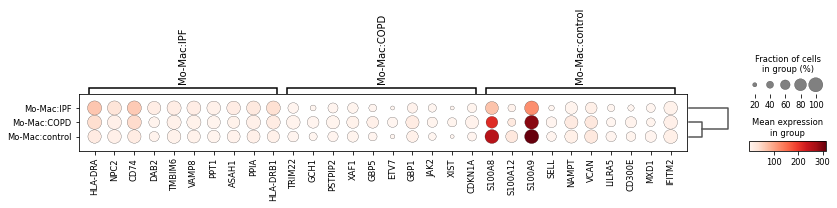

In [53]:
sc.pl.rank_genes_groups_dotplot(final, groupby='selection')

In [58]:
final.uns['groupby']

KeyError: 'groupby'

In [89]:
pd.DataFrame(final.obs['selection'].value_counts())

,selection
Mo-Mac:IPF,518
Mo-Mac:control,333
Mo-Mac:COPD,23


In [95]:
final_test = final[final.obs['selection'] != 'Mo-Mac:COPD',:]
pd.DataFrame(final_test.obs['selection'].value_counts())

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


,selection
Mo-Mac:IPF,518
Mo-Mac:control,333


In [96]:

test = de.test.wald(
    data=final_test.layers['counts'],
    formula_loc="~ 1 + selection",
    factor_loc_totest="selection",
    gene_names=final_test.var_names,
    sample_description=final_test.obs)

training location model: False
training scale model: True
iter   0: ll=13696128.148945
iter   1: ll=13696128.148945, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=9636768.586743, converged: 22.28% (loc: 22.28%, scale update: True), in 195.85sec
iter   3: ll=9636768.586743, converged: 22.28% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=9579692.255556, converged: 91.60% (loc: 91.60%, scale update: True), in 144.75sec
iter   5: ll=9579692.255556, converged: 91.60% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=9574589.953459, converged: 97.13% (loc: 97.13%, scale update: True), in 29.69sec
iter   7: ll=9574589.953459, converged: 97.13% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=9573291.989708, converged: 99.13% (loc: 99.13%, scale update: True), in 17.52sec
iter   9: ll=9573291.989708, converged: 99.13% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=9573025.302907, converged: 99.73% (loc: 99.73%,

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/dask/array/core.py:2720: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [70]:
#view first 10 results
df = test.summary() # .iloc[:10,:]
df['padj'] = RFacade.get_bh_pvalues(df['pval'])
df[df['padj'] < 1e-5].shape
df[df['is.reference.marker']].sort_values('padj')

In [77]:
df['padj'] = RFacade.get_bh_pvalues(df['pval'])

(4028, 11)

In [91]:
df['is.reference.marker'] = df['gene'].isin(marker_genes['MP.all'])
df[df['is.reference.marker']].sort_values('padj')

,gene,pval,qval,log2fc,mean,zero_mean,grad,ll,padj,is.marker,is.reference.marker
9960,FTH1,0.000000e+00,0.000000e+00,0.816507,421.624714,False,3.577428e-08,-6083.411155,0.000000e+00,True,True
17247,APOC1,0.000000e+00,0.000000e+00,1.941283,65.834096,False,7.539805e-08,-2703.765234,0.000000e+00,True,True
17246,APOE,0.000000e+00,0.000000e+00,-2.049537,42.700229,False,4.111489e-08,-2023.394929,0.000000e+00,True,True
17030,TYROBP,0.000000e+00,0.000000e+00,0.621444,47.553776,False,4.342558e-08,-4084.490513,0.000000e+00,True,True
16715,ACP5,0.000000e+00,0.000000e+00,1.903758,13.131579,False,2.136176e-09,-2657.783327,0.000000e+00,True,True
12888,LGALS3,0.000000e+00,0.000000e+00,1.398802,38.653318,False,1.433528e-08,-3937.740570,0.000000e+00,True,True
11717,CD63,0.000000e+00,0.000000e+00,0.908986,46.337529,False,4.085660e-08,-4120.402152,0.000000e+00,True,True
11318,CD9,0.000000e+00,0.000000e+00,2.574399,5.815789,False,1.331996e-07,-1793.996579,0.000000e+00,True,True
10965,LIPA,0.000000e+00,0.000000e+00,1.053868,11.568650,False,1.631616e-09,-2745.826839,0.000000e+00,True,True
10861,PSAP,0.000000e+00,0.000000e+00,0.952683,42.890160,False,5.110588e-08,-4062.129774,0.000000e+00,True,True


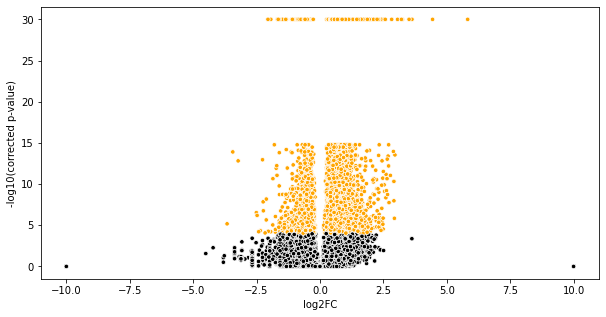

In [90]:
test.plot_volcano(corrected_pval=True, min_fc=1.05, alpha=10e-5, size=20)

In [164]:
from utils import *
marker_genes = get_marker_genes_ipf()

In [167]:
marker_genes['MP.markers'] = {g for g in marker_genes['MP.markers'] if g in set(bal.var.index)}

In [171]:
bal.to_df().head()

,FAM87B,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,LINC01342,TTLL10-AS1,TTLL10,...,PCNT,DIP2A,S100B,PRMT2,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-ND3,MT-ND4L,MT-ND5,MT-ND6,MT-CYB
AAACCCACAAGCAATA-2-1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5.318667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,4.409698,7.995115,8.022135,9.180884,9.116074,5.318667,8.987647,7.636626,3.728637,7.288520,4.409698,8.367990
AAAGAACGTGTCCGTG-2-1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,6.786667,0.0,0.0,0.0,0.0,0.0,0.0,...,4.494189,0.000000,0.0,0.000000,8.289866,8.289866,9.004864,9.174404,4.494189,9.350574,8.244415,5.585324,7.574509,0.000000,8.434414
AAAGGGCCAAGCGCAA-2-1,0.0,4.035824,0.0,4.035824,0.0,0.0,0.0,0.0,6.909366,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.035824,0.0,5.408776,8.484110,7.930377,9.177154,8.736654,0.000000,8.952599,7.385911,5.408776,7.276783,4.035824,8.222956
AAAGGGCCAGCGAGTA-2-1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,9.162926,8.064523,9.258226,9.227458,6.456342,9.093941,8.326815,5.764764,7.371690,0.000000,8.469883
AAAGGTACACGGTGTC-2-1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5.685836,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,5.685836,8.544832,8.373911,9.478003,9.358824,0.000000,8.978400,7.822904,5.908301,8.103107,4.309672,8.266691


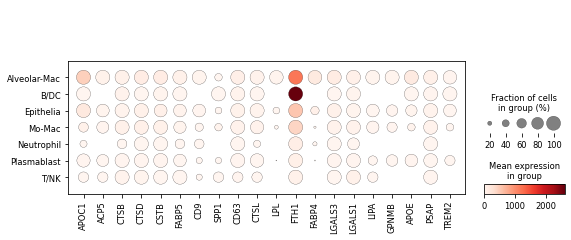

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


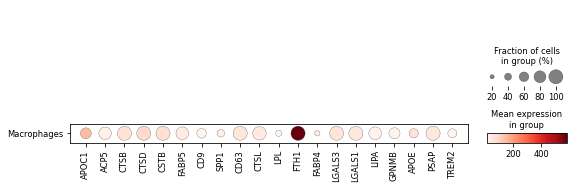

In [177]:

bal.obs['Celltype'].value_counts()
sc.pl.dotplot(bal, var_names=list(marker_genes['MP.markers']), groupby='Celltype', use_raw=None)
sc.pl.dotplot(bal, var_names=list(marker_genes['MP.markers']), groupby='Celltype_2', use_raw=None)